<a href="https://colab.research.google.com/github/osmanaltuna5/PYTHON/blob/main/Malware-Classification_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HW-5: Malware Classification (Due 5th January, 2023)**



In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.ensemble import VotingClassifier

#new tricks
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hw5_data.csv',delimiter=",")

X = df.drop('target',axis=1)
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y)


In [ ]:
#Basic Function for hyperparameter
def hyper_parameter(algorithm, param):
  clf = GridSearchCV(algorithm,param,cv=4)
  clf.fit(X_train, y_train)
 
  print("BestParameters: " , clf.best_params_)
  print("Best Score: " , clf.best_score_)
  return clf.best_estimator_




In [ ]:
# i'm selecting all feature selection sets here
ks = [50,200,300,500,1000,1500,1800]
feature_set = []
feature_names = []
for k in ks:
    select = GenericUnivariateSelect(score_func=mutual_info_classif, mode="k_best", param=k)
    X_k = select.fit_transform(X, y)
    feature_set.append(X_k)
    feature_names.append(select.get_feature_names_out())
    
 # I defined this function for the all algorithms   
def feature_selection(algorithm):
  ac = []
  for k in feature_set:
    score = cross_val_score(algorithm, k, y, cv=4).mean()
    ac.append(score)

  plt.plot(ks, ac)
  plt.xlabel('k')
  plt.ylabel('CV Accuracy')

1-)Logistic Regression


In [ ]:
l_reg =  Pipeline([('scaling', StandardScaler()),('model', LogisticRegression(solver='liblinear'))])
l_reg.fit(X_train,y_train) #Without cross validation
scores = cross_val_score(l_reg,X_test[feature_names[3]],y_test,cv=5)
scores.mean()

0.4856

In [ ]:
param_lr = [
    {
     'model__C': [0.25,0.5,1,2],
     },
     ]
l_reg = hyper_parameter(l_reg,param_lr)

BestParameters:  {'model__C': 0.25}
Best Score:  0.5454747151572523


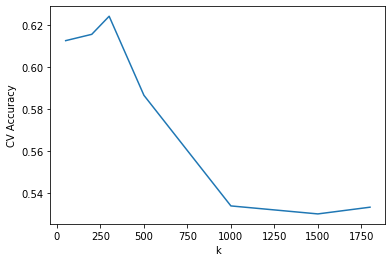

In [ ]:
feature_selection(l_reg)

In [ ]:
l_reg.fit(X_train[feature_names[2]],y_train)

In [ ]:
l_reg.score(X_test[feature_names[2]],y_test)

2-)Decision Tree


In [ ]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_split=2)
tree.fit(X_train,y_train)  
scores = cross_val_score(tree,X_test[feature_names[3]],y_test,cv=5)


In [ ]:
param_tree = [{'criterion': ['gini','entropy'],
               'max_depth': [3,5,9],
               'min_samples_split': [1.0,2,5]},]
result = hyper_parameter(tree,param_tree)
tree = result


BestParameters:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 2}
Best Score:  0.8407574302598912


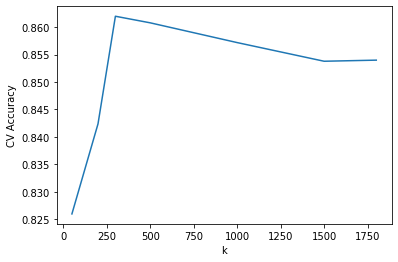

In [ ]:
feature_selection(tree)

In [ ]:
tree.fit(X_train[feature_names[2]],y_train)

DecisionTreeClassifier(max_depth=9)

In [ ]:
tree.score(X_test[feature_names[2]],y_test)

0.8584

*3*-)k-NN Algorithm

In [ ]:
k_nn = KNeighborsClassifier(n_neighbors=5)
k_nn.fit(X_train,y_train)
scores = cross_val_score(k_nn,X_train,y_train,cv=5)
scores.mean()


0.7538000890075656

In [ ]:
param_knn = [{'n_neighbors' : [2,5]},] #I tried to select hyper parameters less because of the time
k_nn = hyper_parameter(k_nn, param_knn)

BestParameters:  {'n_neighbors': 5}
Best Score:  0.750868409135903


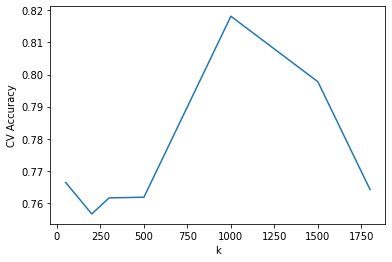

In [ ]:
feature_selection(k_nn)

In [ ]:
k_nn.fit(X_train[feature_names[4]],y_train) #Fit the algorithm with the best features set

KNeighborsClassifier()

In [ ]:
k_nn.score(X_test[feature_names[4]],y_test) # Take the best score from determined features

0.812

*4*-)SVM Algorithm


In [ ]:
svm =  Pipeline([('scaler', StandardScaler()),('svc', SVC())]) # I used Pipline for this algo because of th responsable time
svm.fit(X_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [ ]:
scores = cross_val_score(svm,X_train,y_train,cv=5) #Make a K-fold cross validation
scores.mean()

0.6206992434356919

In [ ]:
svm.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'svc', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [ ]:
param_svm = [{'svc__kernel': ['linear','rbf']
              },]
svm = hyper_parameter(svm,param_svm)

BestParameters:  {'svc__kernel': 'rbf'}
Best Score:  0.6161645841534817


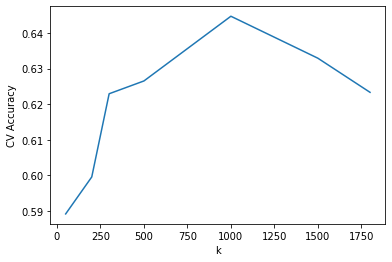

In [ ]:
feature_selection(svm)

In [ ]:
svm.fit(X_train[feature_names[4]],y_train) #Fit the algorithm with the best features set

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [ ]:
svm.score(X_test[feature_names[4]],y_test) # Test with determine features

0.6464

ENSEMBLES

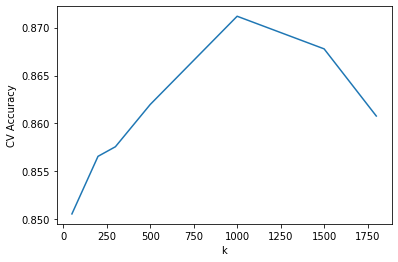

In [ ]:
ems = [('dt', tree),('knn',k_nn ),('lr',l_reg)]
clf4 = VotingClassifier(estimators= ems, weights=None, voting='soft')
scores = np.array([])
feature_selection(clf4)


In [ ]:
clf4.fit(X_train[feature_names[4]],y_train) #Fit the algorithm with the best new feature set

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=9)),
                             ('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('lr',
                              Pipeline(steps=[('scaling', StandardScaler()),
                                              ('model',
                                               LogisticRegression(solver='liblinear'))]))],
                 voting='soft')

I made an ensemble with 3 algorithms and the test result gave the best result. it worked for me to make an Ensemble this way

In [ ]:
clf4.score(X_test[feature_names[4]],y_test) # Best Score between the all algorithms

0.8736